In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lab 6 - Fisher's Linear Discriminant and Logistic Regression
- For equations, refer to Bishop's book, Section 4.1.4 and the slides

# Part I - Fisher's Linear Discriminant for Binary Classification (2 classes)

## Data Generation and Visualisation
- First we'll use scikit-learn to generate 2 blobs of data in 2D, using the [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function.
- The data consists of 600 points divided into 2 classes, 0 and 1.

In [10]:
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_samples=600, centers=2, n_features=2, random_state=0)

Let's confirm the data has two classes

In [12]:
np.unique(y)

array([0, 1])

## Exercise 1
- Now create a scatter plot to visualise the generated data. 
- Make sure to paint each point based on the class they belong to, as shown in the Figure below.

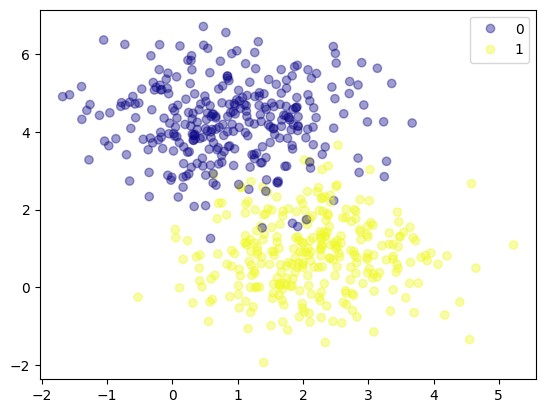

In [13]:
# your code goes here:

plt.figure()
scatter = plt.scatter(X[:,0], X[:,1], c = y, cmap="plasma", alpha=0.4)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(y)))

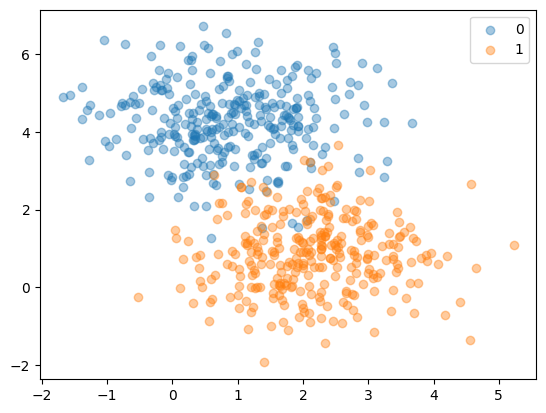

In [14]:
# Opção 2
plt.figure()
plt.scatter(X[:,0][y==0], X[:,1][y==0], alpha=0.4, label = '0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], alpha=0.4, label = '1')
plt.legend()

## Exercise 2
* Now plot a histogram of the data projected on each of the 2 dimensions of $X$ ($0$ and $1$)

As an example, below is a figure that shows the projection on dimension $1$.

_Tips:_ 
* You can either use `histplot()` to generate the plot, in which case it might be easier to pack $X$ and $y$ into a pandas DataFrame.
* Alternatively, considering that you will generate this plot many times throughout this lab, you can write a function that takes the projected vector and the class labels.
* Use 30 bins to obtain a similar plot.

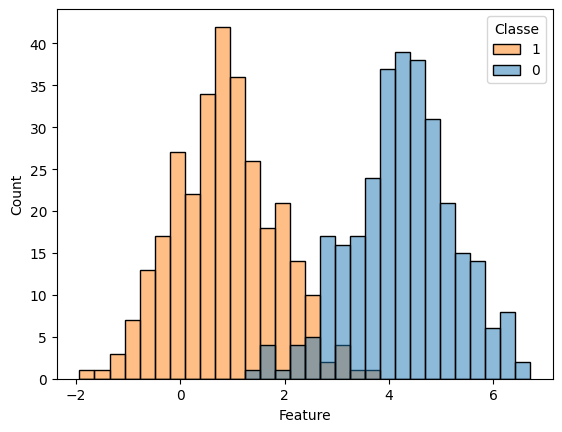

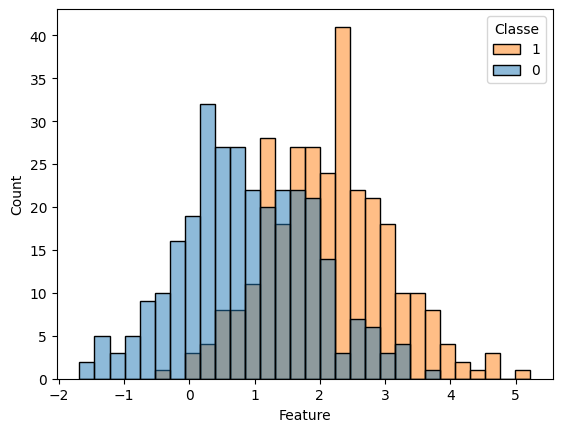

In [15]:
# your code goes here
def plot_histogram(X_column, y):
    plt.figure()
    df = pd.DataFrame({'Feature': X_column, 'Classe': y})
    
    sns.histplot(data=df, x='Feature', hue='Classe', bins=30, alpha=0.5)
    
    plt.legend(labels = list(df['Classe'].unique()), title='Classe')
    
plot_histogram(X[:,1], y)
plot_histogram(X[:,0], y)

## Exercise 3 - Implement Fisher's linear discriminant

* Use numpy to calculate $\vec{w}$.
* Plot the data (as you did in Exercise 1), and add a line on the direction of $\vec{w}$ (reference Figure below).
* Project the points onto the calculated vector, and plot the projection (as you did in Exercise 2) (reference Figure below).

In [16]:
# your code goes here:
def fishers_linear_discriminant(X, y):
    # Calculate the means of each class
    mean_class1 = np.mean(X[y == 0], axis=0)
    mean_class2 = np.mean(X[y == 1], axis=0)

    # Calculate the within-class scatter matrix
    within_class1 = np.cov(X[y == 0], rowvar=False)
    within_class2 = np.cov(X[y == 1], rowvar=False)
    within_class = within_class1 + within_class2

    # Calculate the between-class scatter matrix
    mean_diff = (mean_class1 - mean_class2).reshape(-1, 1)
    
    w = np.linalg.inv(within_class) @ mean_diff

    return w

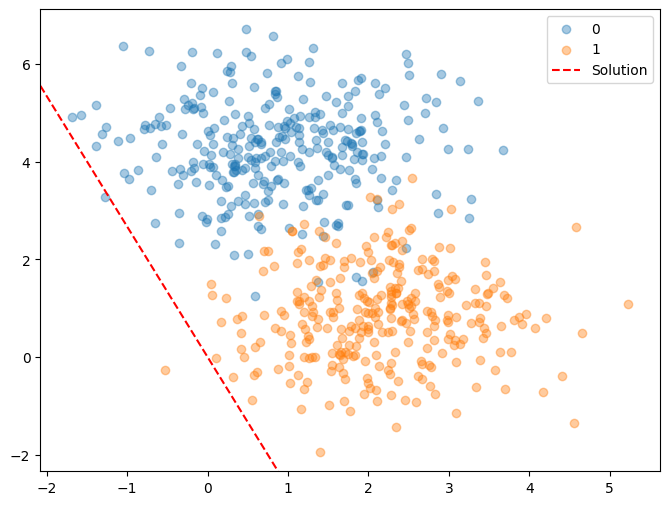

In [17]:
# your code goes here:
w = np.array(fishers_linear_discriminant(X, y)).T

p_0 = np.array([0, 0])
p = p_0 + 8 * w
t = p_0 - 8 * w

ps = np.vstack((t, p))


plt.figure(figsize=(8, 6))
plt.scatter(X[:,0][y==0], X[:,1][y==0], alpha=0.4, label = '0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], alpha=0.4, label = '1')
plt.plot(ps[:, 0], ps[:, 1], 'r--', label='Solution')

plt.ylim(min(np.min(X[:, 1][y == 0]), np.min(X[:, 1][y == 1])) - 0.4,
         max(np.max(X[:, 1][y == 0]), np.max(X[:, 1][y == 1])) + 0.4)

plt.xlim(min(np.min(X[:, 0][y == 0]), np.min(X[:, 0][y == 1])) - 0.4,
         max(np.max(X[:, 0][y == 0]), np.max(X[:, 0][y == 1])) + 0.4)

plt.legend()

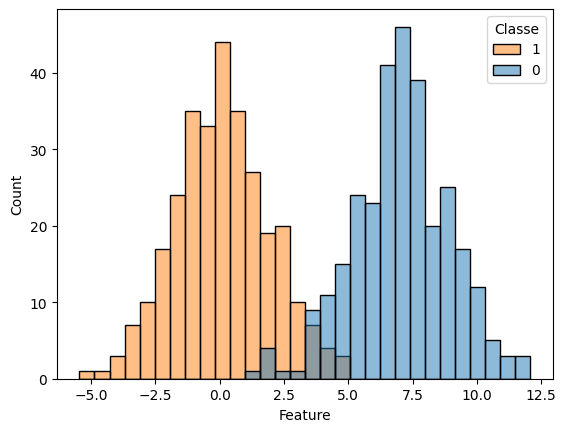

In [40]:
# your code goes here:
fisher_projection = (np.dot(X, w.T)).reshape(1, -1)[0]

plot_histogram(fisher_projection, y)

## Exercise 4

* In this exercise you will use the `RidgeClassifier` from sklearn (as shown below) to obtain the class predictions from different types of projections:
    * component 0 of the data
    * component 1 of the data
    * the calculated vector $\vec{w}$
    
* Calculate the accuracy of these predictions using `accuracy_score` from sklearn.

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [55]:
# your code goes here:
projections = [X[:,0], X[:,1], fisher_projection]

accuracies = []

for projection in projections:
    projection = projection.reshape(-1, 1)
    Ridge = RidgeClassifier()
    Ridge.fit(projection, y)
    predicted_y = Ridge.predict(projection)
    accuracy = accuracy_score(predicted_y, y)
    accuracies.append(accuracy)
    
print(f'''
      accuracy of component 0 of the data : {accuracies[0]:.3f}
      accuracy of component 0 of the data : {accuracies[1]}
      accuracy of fisher's projection : {accuracies[2]}
      ''')


      accuracy of component 0 of the data : 0.737
      accuracy of component 0 of the data : 0.955
      accuracy of fisher's projection : 0.965
      


# Part II - Generalised Linear Discriminant (multi-class)

**NOTE:** For this part you will be using a multi-class estimator from scikit-learn (read the [documentation](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)).

## Exercise 1 - Generate data

* Generate a 3 classes dataset in 2D, with the same rules as before (make 300 points per class)
* Plot the data and then similar histograms (on each dimension) as Part I Exercises 1 and 2.

In [ ]:
# your code goes here: 
X, y = make_blobs(n_samples=900, centers=3, n_features=2, random_state=0)

In [23]:
# your code goes here:
# Mostrando o dado
plt.figure()
plt.scatter(X[:,0][y==0], X[:,1][y==0], alpha=0.4, label = '0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], alpha=0.4, label = '1')
plt.scatter(X[:,0][y==2], X[:,1][y==2], alpha=0.4, label = '2')
plt.legend()

# Histograma
plot_histogram(X[:,1], y)
plot_histogram(X[:,0], y)
plt.show()

## Exercise 2 - Linear Discriminant Analysis

* Use sklearn's implementation of LDA to project the points in a single dimension and then plot the projected data

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Remember that since we want to project our data onto a vector, the parameter n_components of `LinearDiscriminantAnalysis` should be set to 1

In [25]:
# your code goes here: 


## Exercise 3 - Calculate test set accuracy

* use the default parameters for the LDA classifier, and report the prediction accuracy on a train/test split of 70/30% (use `random_state=0`)
* report also the accuracy of the `RidgeClassfier` you used in Part I 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# your code goes here:


# Part III - Logistic Regression for Binary Classification

## Exercise 1 - Load the dataset

* Load the diabetes dataset (`diabetes.csv`)
* Make a 70/30% train test partition of the dataset

*Suggestion:* I suggest you load it with pandas, but make a scikit-learn style dataset ($X$, $y$ numpy arrays)

In [28]:
# your code goes here:


## Excercise 2 - Implementing Logistic Regression

* In this exercise you will implement the logistic regression algorithm to learn the vector of weights $\vec{w}$.
* You will then plot the ROC curve (using your implementation from the Tarefa), and calculate the AUROC (Area Under the ROC curve) using `sklearn.metrics.roc_auc_score()` for the testing set.

You can follow the structure for gradient descent as described in the previous labs and slides. Don't forget to write a function that calculates the sigmoid. You are not allowed in this exercise to use any existing functions.
* **Note that:** in the book and slides `y` is written as `t` and `y_hat` as `y`. 

Remember that $\nabla E(w) = \sum_{n=1}^N (y_n - t_n)\phi_n$ 

* _Tip:_ plot the loss during training to verify that everything is working properly.

In [29]:
# your code goes here:


Evaluate the performance of your model, plot the ROC curve and calculate the AUROC

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
# your code goes here: 


# Part IV - Logistic Regression for multi-class classification

## Exercise 1 - Load the dataset
* Load the famous Iris dataset (using sklearn as shown below)
* Load the data in a matrix $X$ and the target in a vector $y$.
* Make a 70/30% train test partition of the dataset

In [32]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()

Prepare $X$ and $y$

In [34]:
# your code goes here:


Split the data

In [35]:
# your code goes here:


## Exercise 2 - Train the Logistic Regression model
Train your LogisticRegression multi-class classifier using the sklearn implementation. 
* To use the cross entropy loss function and softmax activation function, the `multi_class` parameter needs to be set to "multinomial"

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Let's create an instance of the LogisticRegression classifier for multiclass classification
lr_iris = LogisticRegression(multi_class='multinomial',solver='newton-cg')

Fit the data

In [38]:
# your code goes here: 


## Exercise 3 - Make predictions and evaluate the model
Use the `predict_proba()` method to obtain the output of the predictions for the testing set. The values are the output of the softmax activation function. 
* Remember that the highest value of each prediction corresponds to the actual predicted class.
* Write a function `get_predicted_class()` that transforms the vector of softmax outputs (obtained from `predict_proba()`) to a vector that just contains the predicted class. 
    - This function takes as input a matrix $\hat{Y}_{proba} \in \mathbb{X}^{m\times k}$ where $m$ is the number of samples in the testing set and $k$ is the number of classes.

As an example: if the softmax output is as follows: `Y_pred_sm = [[0.1,0.2,0.7], [0.4,0.3,0.3]]`, then `get_predicted_class(Y_pred_sm)` should return: `[2,0]` as the highest value for the 1st prediction is class 2 and for the 2nd prediction is class 0.

In [39]:
# complete the input argument for the function to obtain the predictions for the testing set.
y_pred_sm = lr_iris.predict_proba()
y_pred = get_predicted_class(y_pred_sm)

TypeError: LogisticRegression.predict_proba() missing 1 required positional argument: 'X'

In [ ]:
def get_predicted_class(Y_proba):
    # your code goes here:
    

Now calculate the accuracy in the testing set using `y_pred`

In [ ]:
# your code goes here:
